In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_164252/2647508162.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
sys.path.append('/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/')
from cardiac import templates
from cardiac import fields
from cardiac import spectrum

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:

import os
# Hack to get Latex working on Perlmutter. Due to Joe de Rose
os.environ['PATH'] = '/global/common/sw/cray/sles15/x86_64/texlive/live/gcc/8.2.0/tiozj27/bin/x86_64-linux/:{}'.format(os.environ['PATH'])

plt.style.use('/global/u1/a/ab2368/plt_styles/JCAP_paper.mplstyle')
plots_dir = '/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/paper/63ffea69c50c290da6f23d0e/plots/'


# Generating templates of anisotropic shifts in $dN/dz$

In [4]:
nside = 128
alpha = -2
lmax_pert = 100

n_samples_of_chi = 2**8 # (a power of 2). Number of samples in chi

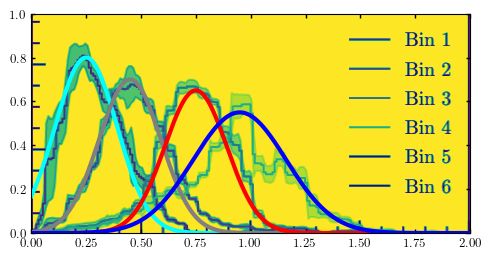

In [83]:
import matplotlib.image as mpimg
img = mpimg.imread('/global/u1/a/ab2368/varying_dndzs/des_source_dndzs.png')

def gaussian(x, x0, width):
    return np.exp(-(x-x0)**2/width**2)

def normed_gauss(x, x0, width):
    unnormed = gaussian(x, x0, width)
    norm = np.max(unnormed)
    return unnormed/norm

xs = np.linspace(0,2,img[:,:,1].shape[1])
imgplot = plt.imshow(img[:,:,1], extent=[0, 2, 0, 1])


plt.plot(xs, 0.8*normed_gauss(xs, 0.25, 0.2), lw=3, color='cyan')
plt.plot(xs, 0.7*normed_gauss(xs, 0.45, 0.2), lw=3, color='gray')
plt.plot(xs, 0.65*normed_gauss(xs, 0.75, 0.2), lw=3, color='r')
plt.plot(xs, 0.55*normed_gauss(xs, 0.95, 0.3), lw=3, color='b')

In [5]:
sigmas = np.array([0.1, 0.2, 0.3, 0.4]) # Standard deviation of the fiducial dndz
sigma_of_shifts = np.array([0.1, 0.6, 1.1, 1.5, 2.])*1e-2 # Matching DES source samples
z_means = np.array([0.2, 0.4, 0.7, 1])# Central redshift of the fiducial dndz
colors = np.array(['r', 'g', 'b', 'k'])
linestyles = np.array(['-', '--', '-.', ':'])
linewidths = np.array([0.2, 0.4, 0.6, 0.8, 1])

In [5]:
title = 'shear'

i=0
for sigma in sigmas:
    for sigma_of_shift in sigma_of_shifts:
        for z_mean in z_means:
            z_max_int = z_mean + 10*sigma # Higher end of the integration range in redshift
            my_grid = fields.grid(nside, n_samples_of_chi, z_max_int=z_max_int)
            test_mock_template = templates.MockTemplate(sigma_of_shift, nside, alpha, lmax_pert)
            gal_kappa = fields.GalShear(my_grid, sigma, z_mean, template_zmean_shifts=test_mock_template)
            filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}_zmean{}'.format(title, alpha, lmax_pert, sigma_of_shift, nside, sigma, z_mean)
            cs_auto = spectrum.Spec(gal_kappa, get_cls=True, save=True, filename=filename)
            i+=1
            print('Done with {}/{}'.format(i, len(sigmas)*len(sigma_of_shifts)*len(z_means)))

Note: redshifts have been re-sorted (earliest first)
Working on l=49
Working on l=53
Working on l=57
Working on l=62
Working on l=66
Working on l=71
Working on l=77
Working on l=82
Working on l=89
Working on l=95
Working on l=103
Working on l=110
Working on l=119
Working on l=128
Working on l=137
Working on l=148
Working on l=159
Working on l=171
Working on l=183
Working on l=197
Working on l=212
Working on l=228
Working on l=245
Working on l=264
Working on l=283
Working on l=305
Working on l=328
Working on l=352
Working on l=379
Working on l=407
Working on l=438
Working on l=471
Working on l=506
Working on l=544
Working on l=585
Working on l=629
Working on l=676
Working on l=727
Working on l=782
Working on l=840
Working on l=903
Working on l=971
Working on l=1044
Working on l=1122
Working on l=1207
Working on l=1297
Working on l=1395
Working on l=1500
Using mode full
Working on l=49
Working on l=53
Working on l=57
Working on l=62
Working on l=66
Working on l=71
Working on l=77
Working

In [ ]:
title = 'shear'

i=0
for sigma in sigmas:
    for sigma_of_shift in sigma_of_shifts:
        for z_mean in z_means:
            filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}_zmean{}'.format(title, alpha, lmax_pert, sigma_of_shift, nside, sigma, z_mean)
            cs_auto = spectrum.Spec(load=True, filename=filename)

Now the effective $\chi$'s the bias probes are different from those of the standard, isotropic case

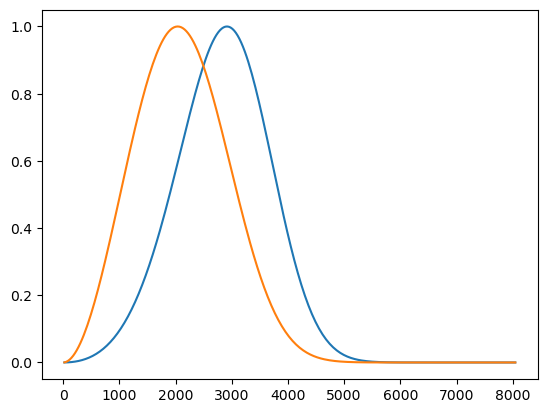

In [8]:
plt.plot(cs_auto.grid.chi_array, cs_auto.cov_at_chi/np.max(cs_auto.cov_at_chi))
plt.plot(cs_auto.grid.chi_array, cs_auto.kernel(cs_auto.grid.chi_array)/np.max(cs_auto.kernel(cs_auto.grid.chi_array)))

#### Amplitude

In [21]:
def plot_bias(exp, ls=None, color=None, label=None, lw=None):
    plt.semilogy(cs_auto.ells, cs_auto.conv_bias/cs_auto.unbiased_cls, ls=ls, color=color, label=label, lw=lw)
    plt.xlabel(r'$l$')
    plt.ylabel(r'$\Delta C_l/C_l$')
    return

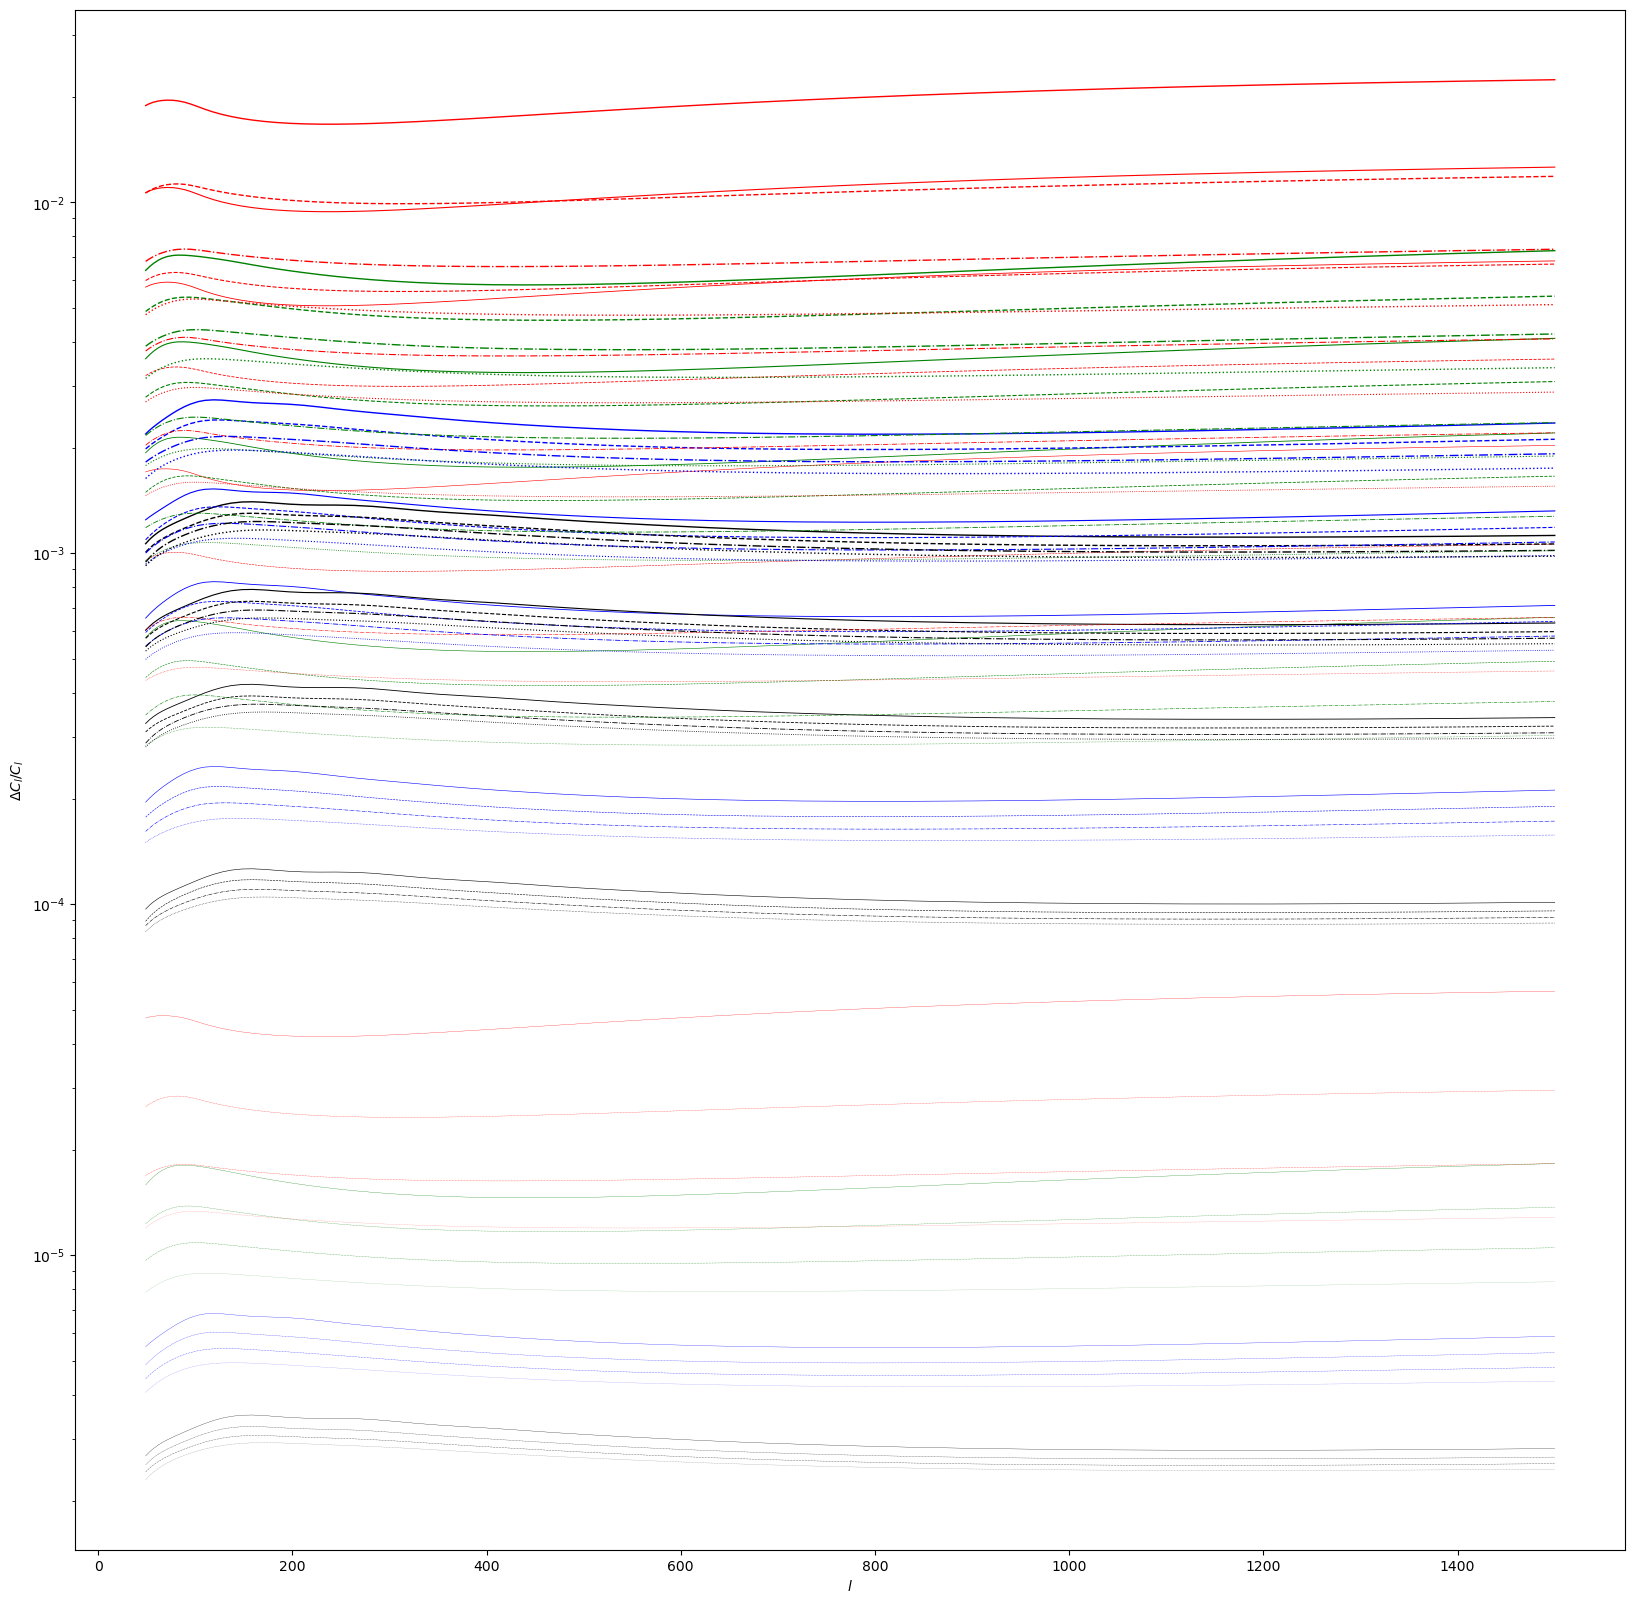

In [27]:
title = 'shear'

plt.figure(figsize=(20,20))

i=0
for sigma, linestyle in zip(sigmas, linestyles):
    for sigma_of_shift, linewidth in zip(sigma_of_shifts, linewidths):
        for z_mean, color in zip(z_means, colors):
            filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}_zmean{}'.format(title, alpha, lmax_pert, sigma_of_shift, nside, sigma, z_mean)
            cs_auto = spectrum.Spec(load=True, filename=filename)
            plot_bias(cs_auto, color=color, ls=linestyle, lw=linewidth)

At fixed sigma and sigma_of_shift, the bias is worse for closer-by samples. Does this apply to galaxy clustering as well?

The bias is worse for narrower source distributions, ceteris paribus

And the bias is obviously very sensitive to perturbations (worse for larger perturbations)

$\Delta C_l^{\kappa\kappa}/ C_l^{\kappa\kappa}$ is still relatively flat, though not as much as before

### Amplitude FOM

In [14]:
title = 'shear'

sigmas = np.array([0.1, 0.2, 0.3, 0.4]) # Standard deviation of the fiducial dndz
linestyles = np.array(['-', '--', '-.', ':'])

sigma_of_shifts = np.array([0.6, 1.1, 1.5, 2.])*1e-2#np.array([0.1, 0.6, 1.1, 1.5, 2.])*1e-2 # Matching DES source samples
linewidths = np.array([0.2, 0.4, 0.6, 0.8, 1])

z_means = np.array([0.2, 0.4, 0.7, 1])# Central redshift of the fiducial dndz
colors = np.array(['r', 'g', 'b', 'k'])

In [15]:
bias_fom = np.zeros((len(sigma_of_shifts), len(z_means), len(sigmas)))
signal_fom = np.zeros((len(sigma_of_shifts), len(z_means), len(sigmas)))
mc_fom = np.zeros((len(sigma_of_shifts), len(z_means), len(sigmas)))

i = 0
for sigma_zshift in sigma_of_shifts:
    j=0
    for z_mean in z_means:
        k=0
        for sigma in sigmas:
            filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}_zmean{}'.format(title, -2, 100, sigma_zshift, 128, sigma, z_mean)
            loaded_exp = spectrum.Spec(load=True, filename=filename)

            mc_fom[i,j,k] = np.trapz(loaded_exp.conv_bias, loaded_exp.ells) / np.trapz(np.ones_like(loaded_exp.ells), loaded_exp.ells)
            signal_fom[i,j,k] = np.trapz(loaded_exp.unbiased_cls, loaded_exp.ells) / np.trapz(np.ones_like(loaded_exp.ells), loaded_exp.ells)
            bias_fom[i,j,k] = np.trapz(loaded_exp.conv_bias/loaded_exp.unbiased_cls, loaded_exp.ells) / np.trapz(np.ones_like(loaded_exp.ells), loaded_exp.ells)
            k+=1
        j+=1
    i+=1

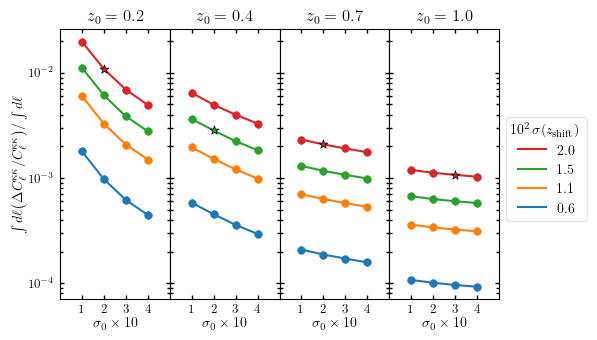

In [18]:
# Locations to mark as DES source galaxy properties. sigma_0 determined in a cell above by comparing to fig 1 from 2105.13549. z_shift from Table I of the same paper
des_source_props = np.array(([sigmas[1], sigma_of_shifts[-1]], [sigmas[1], sigma_of_shifts[-2]],
                             [sigmas[1], sigma_of_shifts[3]], [sigmas[2], sigma_of_shifts[-1]])) # One row per z_0, one column for each of sigma_0 and sigma_z_shift

sigma_zshift_labels = np.array([r'0.6',
                                r'1.1', r'1.5', r'2.0'])



fig = plt.figure()
gs = fig.add_gridspec(nrows=1, ncols=4, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)

j=0
for z_mean in z_means:
    i = 0
    axs[j].set_title(r'$z_{0}='+str(z_mean)+'$')
    for sigma_zshift, label in zip(sigma_of_shifts, sigma_zshift_labels):
        if j==3:
            label = label
        else:
            label = None
        k=0
        axs[j].plot(sigmas, bias_fom[i,j,:], color="C{}".format(i), label=label)
        axs[j].set_xlabel(r'$\sigma_0\times 10$')

        for sigma in sigmas:
            if all(des_source_props[j,:] == (sigma, sigma_zshift)):
                marker='*'
                markersize = 45
                edgecolors='k'
            else:
                marker='o'
                markersize=30
                edgecolors=None
            axs[j].scatter(sigma, bias_fom[i,j,k], color="C{}".format(i), marker=marker, s=markersize, edgecolors=edgecolors, zorder=1000, linewidths=0.5)
            k+=1
        i+=1
    j+=1

plt.yscale('log')
plt.xlim([0.0,0.5])

axs[0].set_xticks(sigmas, (10*sigmas).astype(int).astype(str))
plt.legend(bbox_to_anchor=(1, 0.7), frameon=True, reverse=True, title=r'$ 10^{2}\,\sigma(z_\mathrm{shift})$')

axs[0].set_ylabel(r'$\int d\ell \big(\Delta C^{\kappa\kappa}_\ell/ C^{\kappa\kappa}_\ell \big)/ \int d\ell$')
plt.savefig(plots_dir+'fig_mcbias_vs_sigma_shear.pdf', bbox_inches='tight', dpi=600)

## Shape and approximation

In [ ]:
title = 'shear'

plt.figure(figsize=(20,20))

i=0
for sigma, linestyle in zip(sigmas, linestyles):
    for sigma_of_shift, linewidth in zip(sigma_of_shifts, linewidths):
        for z_mean, color in zip(z_means, colors):
            filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}_zmean{}'.format(title, alpha, lmax_pert, sigma_of_shift, nside, sigma, z_mean)
            cs_auto = spectrum.Spec(load=True, filename=filename)
            plot_bias(cs_auto, color=color, ls=linestyle, lw=linewidth)

### Flatness

In [6]:
sigmas = np.array([0.1, 0.2, 0.3, 0.4]) # Standard deviation of the fiducial dndz
linestyles = np.array(['-', '--', '-.', ':'])

sigma_of_shifts = np.array([0.1, 0.6, 1.1, 1.5, 2.])*1e-2 # Matching DES source samples
linewidths = np.array([0.2, 0.4, 0.6, 0.8, 1])

z_means = np.array([0.2, 0.4, 0.7, 1])# Central redshift of the fiducial dndz
colors = np.array(['r', 'g', 'b', 'k'])

In [9]:
def plot_approx(exp, ls=None, color=None, label=None, lw=None):
    plt.plot(cs_auto.ells, (cs_auto.analytic_mcbias_via_variance-cs_auto.conv_bias)/cs_auto.conv_bias, ls=ls, color=color, label=label, lw=lw)
    plt.xlabel(r'$l$')
    plt.ylabel(r'$\Delta C_l^{\mathrm{approx}}/\Delta C_l$')
    return

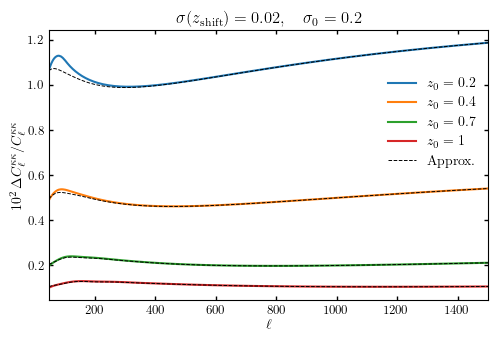

In [29]:
title = 'shear'

z_means_labels = np.array([r'z_0=0.2', r'z_0=0.4', r'z_0=0.7', r'z_0=1'])
sigma_of_shift_to_plot = 0.02
sigma_to_plot = 0.2

scaling_power = 2

i=0
for z_mean, color in zip(z_means, colors):
    j=0
    for sigma, linestyle in zip(np.array([sigma_to_plot]), linestyles):
        k=0
        for sigma_of_shift, linewidth in zip(np.array([sigma_of_shift_to_plot]), linewidths):
            if j==0:
                label = r'${}$'.format(z_means_labels[i])
            else:
                label=None
            if j==0 and k==0 and i==3:
                approx_label=r'Approx.'
            else:
                approx_label=None
            filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}_zmean{}'.format(title, alpha, lmax_pert, sigma_of_shift, nside, sigma, z_mean)
            cs_auto = spectrum.Spec(load=True, filename=filename)
            plt.plot(cs_auto.ells, 10**scaling_power * cs_auto.conv_bias/cs_auto.unbiased_cls, color="C{}".format(i), lw=1.5, label=label)
            plt.plot(cs_auto.ells, 10**scaling_power * cs_auto.analytic_mcbias_via_variance/cs_auto.unbiased_cls, ls='--', color='k', lw=0.7, label=approx_label)#"C{}".format(i))
            k+=1
        j+=1
    i+=1

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel(r'$10^{'+str(scaling_power)+'}\,\Delta C^{\kappa\kappa}_\ell/ C^{\kappa\kappa}_\ell $')
plt.xlabel(r'$\ell $')
plt.title(r'$\sigma(z_{\mathrm{shift}})='+str(sigma_of_shift_to_plot)+',\quad \sigma_0='+str(sigma_to_plot)+'$')
plt.legend(bbox_to_anchor=(1., 0.87))
plt.xlim([50,1500])
plt.savefig(plots_dir+'fig_shear_bias_shape.pdf', bbox_inches='tight', dpi=600)

At low $l$, approximation is worse for closer-by samples

#### Covariance

In [4]:
sigmas = np.array([0.1, 0.2, 0.3, 0.4]) # Standard deviation of the fiducial dndz
linestyles = np.array(['-', '--', '-.', ':'])

sigma_of_shifts = np.array([0.1, 0.6, 1.1, 1.5, 2.])*1e-2 # Matching DES source samples
linewidths = np.array([0.2, 0.4, 0.6, 0.8, 1])

z_means = np.array([0.2, 0.4, 0.7, 1])# Central redshift of the fiducial dndz
colors = np.array(['r', 'g', 'b', 'k'])

In [37]:
def plot_cov(exp, ls=None, color=None, label=None, lw=None):
    plt.plot(cs_auto.grid.chi_array, cs_auto.cov_at_chi/np.max(cs_auto.cov_at_chi), ls=ls, color=color, label=label, lw=lw)
    plt.xlabel(r'$\chi$')
    plt.ylabel(r'Normalzied $W(\chi)$')
    return

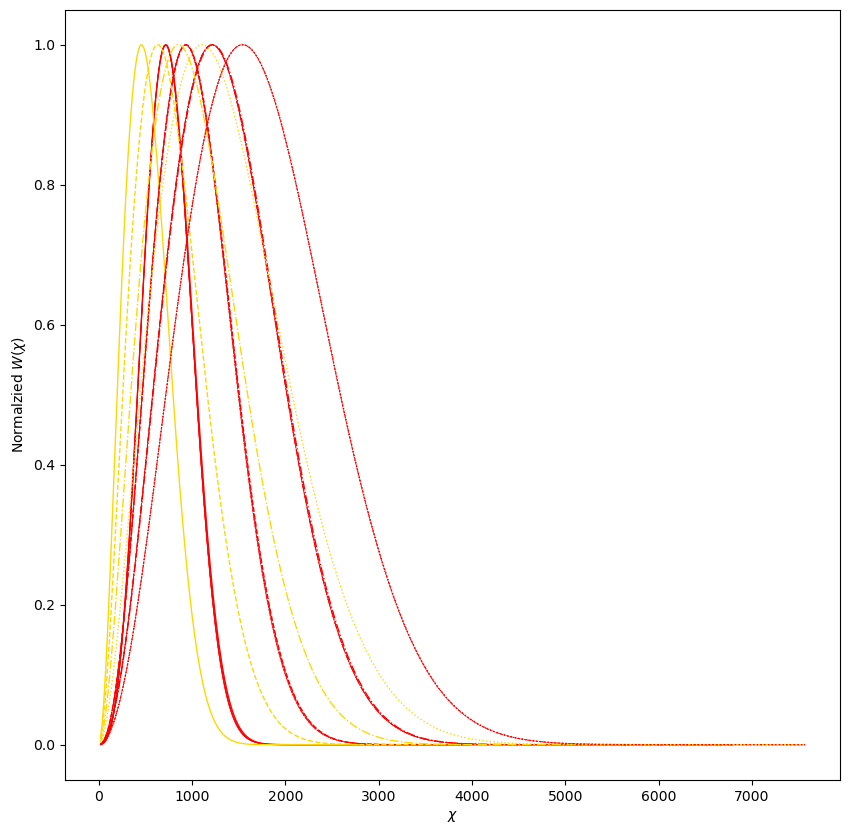

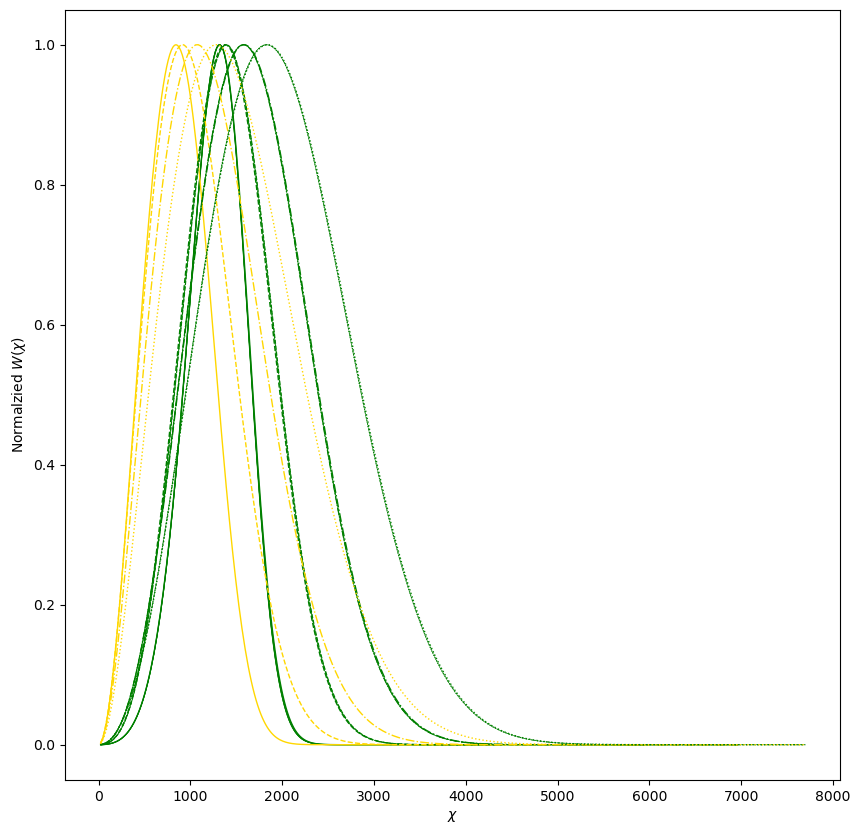

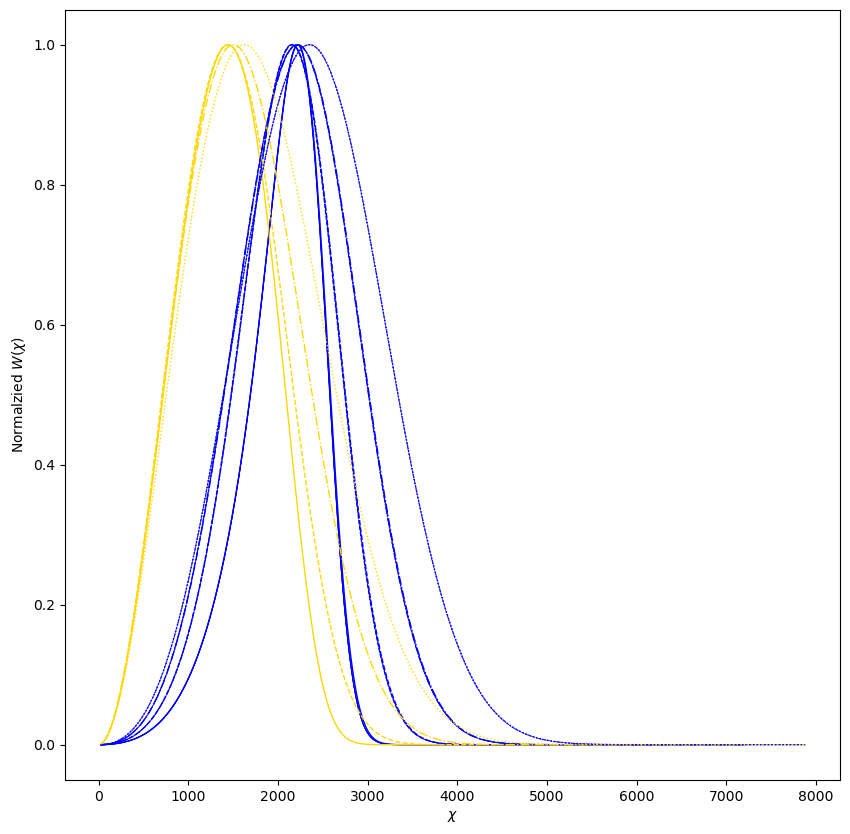

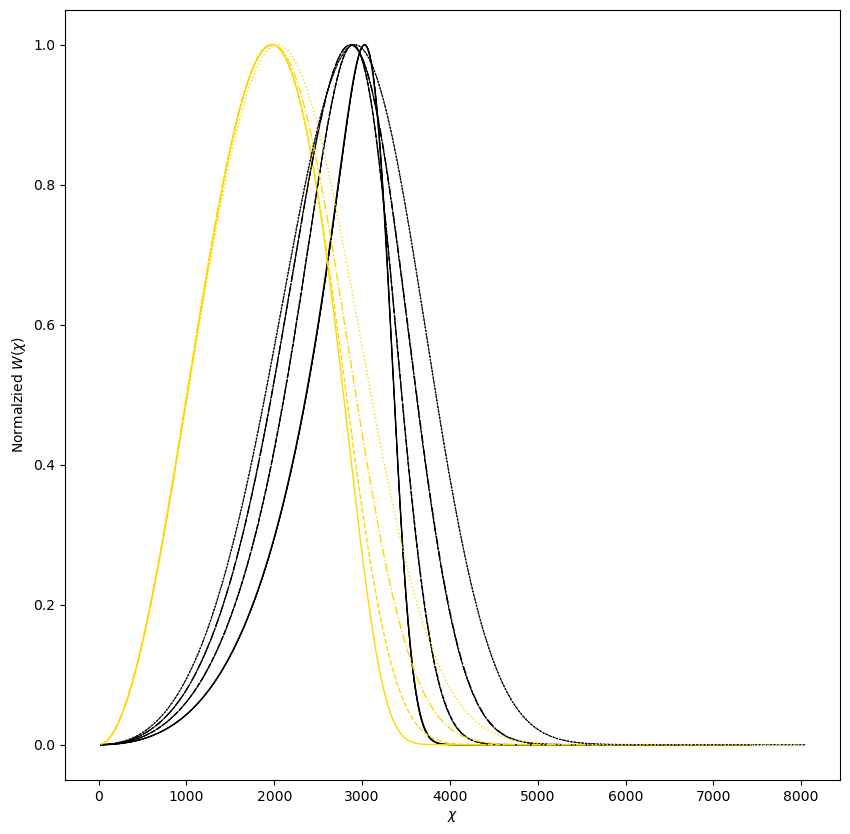

In [41]:
title = 'shear'

i=0

for z_mean, color in zip(z_means, colors):
    plt.figure(figsize=(10,10))
    for sigma, linestyle in zip(sigmas, linestyles):
        for sigma_of_shift, linewidth in zip(sigma_of_shifts, linewidths):
            filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}_zmean{}'.format(title, alpha, lmax_pert, sigma_of_shift, nside, sigma, z_mean)
            cs_auto = spectrum.Spec(load=True, filename=filename)
            plot_cov(plot_bias, color=color, ls=linestyle, lw=linewidth)
        plt.plot(cs_auto.grid.chi_array, cs_auto.kernel(cs_auto.grid.chi_array)/np.max(cs_auto.kernel(cs_auto.grid.chi_array)), ls=linestyle, color='gold', lw=1)
    plt.show()

Does the analytic approximation necessarily entail flatness? I don't think so

### Plotting kernels for insight into flatness

In [85]:
import os
# Hack to get Latex working on Perlmutter. Due to Joe de Rose
os.environ['PATH'] = '/global/common/sw/cray/sles15/x86_64/texlive/live/gcc/8.2.0/tiozj27/bin/x86_64-linux/:{}'.format(os.environ['PATH'])

#plt.style.use('/global/u1/a/ab2368/plt_styles/JCAP_paper.mplstyle')
plt.style.use('/global/u1/a/ab2368/plt_styles/JCAP_paper_twothirdssize.mplstyle')
plots_dir = '/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/paper/63ffea69c50c290da6f23d0e/plots/'

In [170]:
title = 'shear'
sigma = 0.2 # Standard deviation of the fiducial dndz
sigma_of_shift = 2*1e-2 # Matching DES source samples
z_mean = 0.7 # Central redshift of the fiducial dndz

filename = '/pscratch/sd/a/ab2368/data/{}_alpha{}_lmaxpert{}_sigmazshift{}_nside{}_sigma{}_zmean{}'.format(title, alpha, lmax_pert, sigma_of_shift, nside, sigma, z_mean)
cs_auto = spectrum.Spec(load=True, filename=filename)

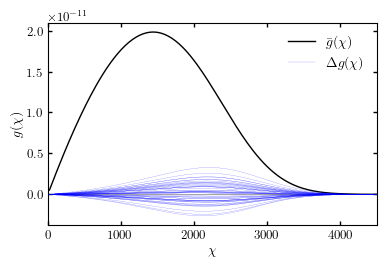

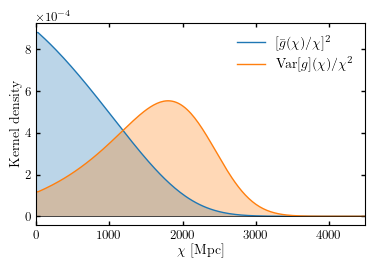

In [87]:
plt.plot(cs_auto.grid.chi_array, cs_auto.field1.p_fid_array, color='k', lw=1, label=r'$\bar{g}(\chi)$')
# Plot the Delta g (z) at a random pixel
plt.axhline(0, color='gray', lw=0.5)
for idx in np.random.randint(0, cs_auto.grid.npix, size=49):
    plt.plot(cs_auto.grid.chi_array, cs_auto.field1.delta_p_maps[idx,:], color='b', lw=0.1)

plt.plot(cs_auto.grid.chi_array, cs_auto.field1.delta_p_maps[idx,:], color='b', lw=0.1, label=r'$\Delta g(\chi)$')
plt.legend()
plt.ylabel(r'$g(\chi)$')
plt.xlabel(r'$\chi$')
plt.xlim([0,4500])
plt.show()

chis = np.arange(0,cs_auto.grid.chi_array[-1])


standard_kernel_norm = np.trapz(cs_auto.kernel(cs_auto.grid.chi_array)/cs_auto.grid.chi_array**2, cs_auto.grid.chi_array)
standard_kernel_density = cs_auto.kernel(cs_auto.grid.chi_array)/cs_auto.grid.chi_array**2 / standard_kernel_norm
standard_kernel_density_interp = np.interp(chis, cs_auto.grid.chi_array, standard_kernel_density)

plt.plot(chis, standard_kernel_density_interp, lw=1, label=r'$[\bar{g}(\chi)/\chi]^2$')
plt.fill_between(chis, 0, standard_kernel_density_interp, ls='-', alpha=0.3,)

bias_kernel_norm = np.trapz(cs_auto.cov_at_chi/cs_auto.grid.chi_array**2, cs_auto.grid.chi_array)
bias_kernel_density = cs_auto.cov_at_chi/cs_auto.grid.chi_array**2 / bias_kernel_norm
bias_kernel_density_interp = np.interp(chis, cs_auto.grid.chi_array, bias_kernel_density)

plt.plot(chis, bias_kernel_density_interp, lw=1, label=r'$\mathrm{Var}[g](\chi) / \chi^2$')
plt.fill_between(chis, 0, bias_kernel_density_interp, ls='-', alpha=0.3,)

plt.legend()
plt.xlabel(r'$\chi$ [Mpc]')
plt.ylabel(r'Kernel density')
plt.ticklabel_format(axis='y', style='sci', scilimits=(1,4))
plt.xlim([0,4500])
plt.axhline(0, lw=0.5, color='k')
plt.savefig(plots_dir+'fig_shear_kernels.pdf', bbox_inches='tight', dpi=600)

Note that a positive/negative $z_{\mathrm{shift}}$ necessarily means a positive/negative $\Delta g$

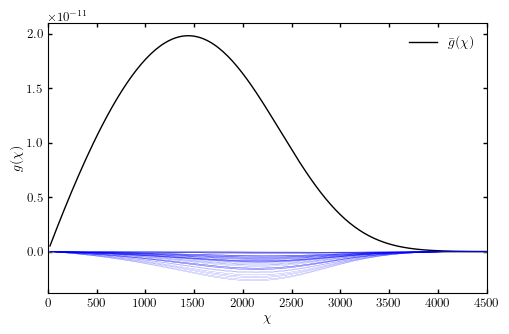

In [197]:
plt.plot(cs_auto.grid.chi_array, cs_auto.field1.p_fid_array, color='k', lw=1, label=r'$\bar{g}(\chi)$')
# Plot the Delta g (z) at a random pixel
plt.axhline(0, color='gray', lw=0.5)
for idx in np.random.choice(np.where(cs_auto.field1.template_zmean_shifts.map<0)[0], size=50):
    plt.plot(cs_auto.grid.chi_array, cs_auto.field1.delta_p_maps[idx,:], color='b', lw=0.1)
#plt.plot(cs_auto.grid.chi_array, cs_auto.field1.delta_p_maps[idx,:], color='b', lw=0.1, label=r'$\Delta g(\chi)$')
plt.legend()
plt.ylabel(r'$g(\chi)$')
plt.xlabel(r'$\chi$')
plt.xlim([0,4500])
plt.show()
